In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 50) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
''' Hay todo tipo de datos incorrectos
'''

df['direccion'].to_frame()

,direccion
0,Avenida Division del Norte 2005
1,AV. MEXICO
2,Urbi Tonala
3,IGNACIO MANUEL ALTAMIRANO 128
4,PASEOS DEL SOL
5,Condominio Tlalpan 2B
6,NaN
7,condominio el trebol
8,BUENAVISTA DEPTOS CON SUBSIDIO
9,Av. Morelos


In [6]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format')
df.sample(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
142767,273195,oportunidad venta departamento en división y p...,muy bien ubicado departamento en venta en la d...,Apartamento,Pitágoras esquina División del Norte,Benito Juárez,Distrito Federal,3.0,2.0,2.0,2.0,85.0,85.0,50003995.0,19.382914,-99.159919,2014-07-18 00:00:00,0.0,0.0,0.0,1.0,1.0,2100000.0
55410,156332,casa en venta en monterrey,"id:33935, hermosa casa en fraccionamiento priv...",Casa,NaN,Monterrey,Nuevo León,NaN,3.0,2.0,2.0,182.0,133.0,NaN,25.761810,-100.412995,2016-03-29 00:00:00,0.0,0.0,0.0,0.0,0.0,1890000.0
128520,191108,departamento en venta en olivar de los padres,-- rav01691n-108 -- deptos de primer nivel&...,Apartamento,Av de las Torres 805,Alvaro Obregón,Distrito Federal,0.0,1.0,2.0,1.0,55.0,NaN,23365.0,NaN,NaN,2016-03-08 00:00:00,0.0,0.0,0.0,0.0,0.0,2700000.0
51044,44094,oficina en venta en anzures,"oficina en venta en miguel hidalgo, col. anzu...",Oficina comercial,Bahía de San Cristobal,Miguel Hidalgo,Distrito Federal,NaN,1.0,0.0,NaN,15.0,NaN,24606.0,NaN,NaN,2016-07-04 00:00:00,0.0,0.0,0.0,0.0,0.0,764793.0
147648,123360,penthouse en venta en acapulco cerca de playa,penthouse con excelente ubicación a una cuadra...,Apartamento,Fragata endenvour sn,Acapulco de Juárez,Guerrero,20.0,3.0,1.0,3.0,236.0,236.0,38012.0,16.850000,-99.854000,2016-12-02 11:23:07,0.0,0.0,0.0,0.0,0.0,3550000.0


In [7]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Título',
                 'descripcion' : 'Descripción',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Dirección',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antigüedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBaños',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMúltiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [8]:
''' Reacomidamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Título',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antigüedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripción',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBaños',
               
                 'IDZona',
                 'Dirección',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMúltiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

,ID,Título,TipoPropiedad,Precio,Fecha,Antigüedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripción,CantHabitaciones,CantGarages,CantBaños,IDZona,Dirección,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMúltiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala com...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0
2,247984,casa en venta urbi 3 recamaras tonala,Casa,1200000.0,2015-10-17 00:00:00,5.0,144.0,166.0,descripcion \nla mejor ubicacion residencial e...,3.0,2.0,2.0,48551.0,Urbi Tonala,Tonalá,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
''' 
Remover NaN para consistencia.

A su vez Eliminar Título, Dirección y Descripción por no aportar nada cuantificable que pueda ser útil para los gráficos.
Si se requiere analizar datos anómalos o alguna otra cosa que los requiera  para descartar posibilidades, 
se los reflotará en particular.
'''

dfl = dfok.drop('Título', axis = 'columns')
dfl = dfl.drop('Descripción', axis = 'columns')
dfl = dfl.drop('Dirección', axis = 'columns')
dfl = dfl.dropna()
dfl.info() #9 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55229 entries, 1 to 239998
Data columns (total 20 columns):
ID                          55229 non-null int64
TipoPropiedad               55229 non-null object
Precio                      55229 non-null float64
Fecha                       55229 non-null object
Antigüedad                  55229 non-null float64
MetrosCuadradosCubiertos    55229 non-null float64
MetrosCuadradosTotales      55229 non-null float64
CantHabitaciones            55229 non-null float64
CantGarages                 55229 non-null float64
CantBaños                   55229 non-null float64
IDZona                      55229 non-null float64
Ciudad                      55229 non-null object
Provincia                   55229 non-null object
Latitud                     55229 non-null float64
Longitud                    55229 non-null float64
TieneGimnasio               55229 non-null float64
TieneUsosMúltiples          55229 non-null float64
TienePileta                 5

In [10]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11087703704834

In [11]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfl['ID'].max(),
    
dfl['Antigüedad'].max(), 
dfl['CantHabitaciones'].max(), 
dfl['CantGarages'].max(),
dfl['CantBaños'].max() ,

dfl['MetrosCuadradosCubiertos'].max(),
dfl['MetrosCuadradosTotales'].max(),    
dfl['IDZona'].max(),
dfl['Precio'].max(),] 

[299997, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12520000.0]

In [12]:
''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfl['ID'] = dfl['ID'].astype(np.uint32)

dfl['Antigüedad'] = dfl['Antigüedad'].astype(np.uint8)
dfl['CantHabitaciones'] = dfl['CantHabitaciones'].astype(np.uint8)
dfl['CantGarages'] = dfl['CantGarages'].astype(np.uint8)
dfl['CantBaños'] = dfl['CantBaños'].astype(np.uint8)

dfl['MetrosCuadradosCubiertos'] = dfl['MetrosCuadradosCubiertos'].astype(np.uint16)
dfl['MetrosCuadradosTotales'] = dfl['MetrosCuadradosTotales'].astype(np.uint16)
dfl['IDZona'] = dfl['IDZona'].astype(np.uint32)
dfl['Precio'] = dfl['Precio'].astype(np.uint32)

# Booleanos
dfl['TieneGimnasio'] = dfl['TieneGimnasio'].astype(np.bool)
dfl['TieneUsosMúltiples'] = dfl['TieneUsosMúltiples'].astype(np.bool)
dfl['TienePileta'] = dfl['TienePileta'].astype(np.bool)
dfl['TieneEscuelasCerca'] = dfl['TieneEscuelasCerca'].astype(np.bool)
dfl['TieneShoppingsCerca'] = dfl['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfl['Fecha'] = dfl['Fecha'].astype('datetime64')

# Categóricas
dfl['TipoPropiedad'] = dfl['TipoPropiedad'].astype('category')
dfl['Ciudad'] = dfl['Ciudad'].astype('category')
dfl['Provincia'] = dfl['Provincia'].astype('category')

dfl.info() #3 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55229 entries, 1 to 239998
Data columns (total 20 columns):
ID                          55229 non-null uint32
TipoPropiedad               55229 non-null category
Precio                      55229 non-null uint32
Fecha                       55229 non-null datetime64[ns]
Antigüedad                  55229 non-null uint8
MetrosCuadradosCubiertos    55229 non-null uint16
MetrosCuadradosTotales      55229 non-null uint16
CantHabitaciones            55229 non-null uint8
CantGarages                 55229 non-null uint8
CantBaños                   55229 non-null uint8
IDZona                      55229 non-null uint32
Ciudad                      55229 non-null category
Provincia                   55229 non-null category
Latitud                     55229 non-null float64
Longitud                    55229 non-null float64
TieneGimnasio               55229 non-null bool
TieneUsosMúltiples          55229 non-null bool
TienePileta                 5522

In [13]:
# Así se podría graficar con pandas, pero es mejor hacerlo con pyplot
# dfok.plot(title = 'Precios según habitación', kind = 'scatter', x = 'CantHabitaciones', y = 'Precio', )
(dfl.memory_usage(deep = True).sum()/1024)/1024 #Memoria actual

3.270139694213867

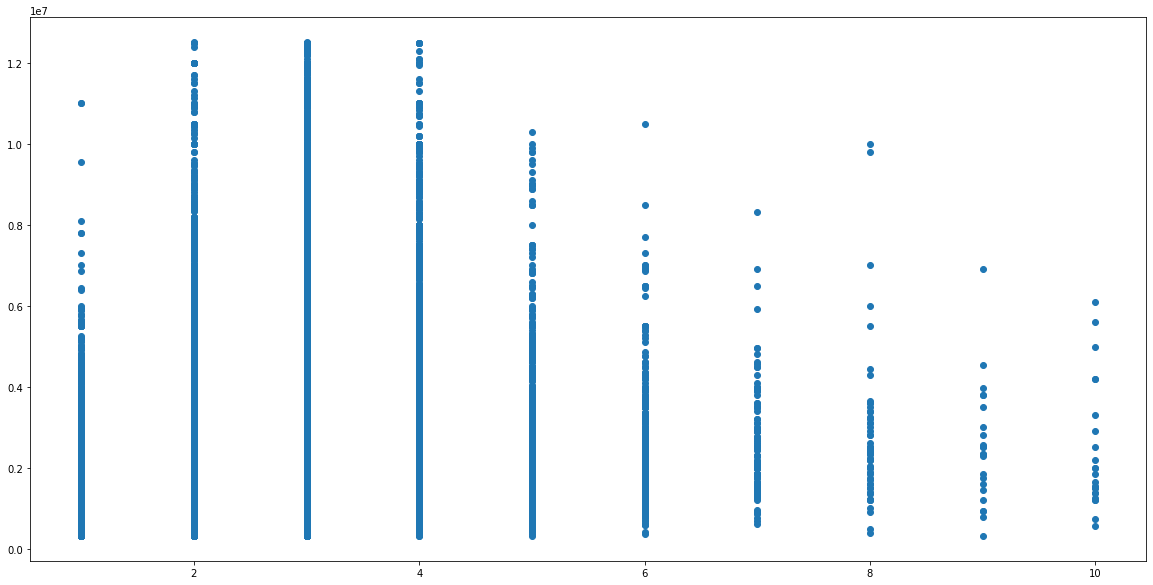

In [14]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (20, 10))

# Variables a graficar
x = dfl['CantHabitaciones']
y = dfl['Precio']

# Tipo de gráfico
plt.scatter(x, y)

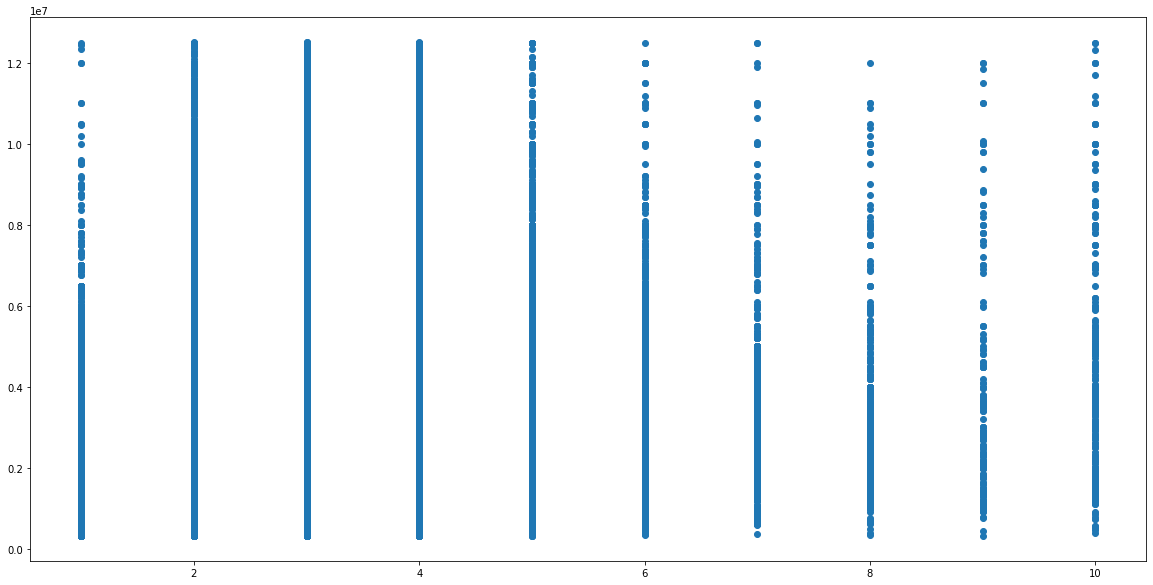

In [15]:
''' Con df...
'''

# Declarás variables a graficar
x = df['habitaciones']
y = df['precio']

plt.figure(figsize = (20, 10))

# Tipo de gráfico
plt.scatter(x, y)

In [16]:
''' PROMEDIO: por eso el precio con coma.'''

pd.options.display.float_format = '{:_.0f}'.format
dfl.groupby('CantHabitaciones').mean()['Precio']

CantHabitaciones
1    1_765_359
2    1_454_701
3    2_392_647
4    2_808_382
5    2_496_705
6    2_503_946
7    2_544_754
8    2_768_281
9    2_507_826
10   2_420_435
Name: Precio, dtype: float64

In [17]:
dfl.groupby('CantHabitaciones').std()['Precio'] / pow(dfl.groupby('CantHabitaciones').count()['ID'], 1/2) #Aplicando De Moivre

CantHabitaciones
1     49_086
2     12_595
3     10_222
4     23_961
5     53_137
6     84_617
7    127_229
8    245_211
9    307_046
10   327_417
dtype: float64

In [18]:
pd.reset_option('float_format') # Volver a la normalidad el formato de los float
print(dfl.groupby('CantHabitaciones').count()['ID'])

CantHabitaciones
1       993
2     15054
3     31489
4      6104
5      1032
6       340
7       114
8        57
9        23
10       23
Name: ID, dtype: int64


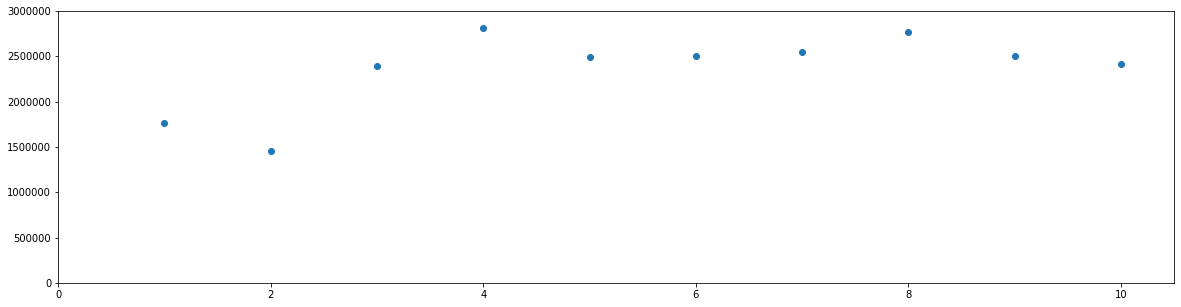

In [31]:
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfl.groupby('CantHabitaciones').mean()['Precio']

plt.figure(figsize = (20, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 3000000])

# Tipo de gráfico
plt.scatter(x, y)

In [20]:
dfl['Precio'].sort_values()

235742      310000
126447      310000
149718      310000
75074       310000
113392      310000
            ...   
234867    12500000
22365     12500000
131984    12500000
192956    12516000
81715     12520000
Name: Precio, Length: 55229, dtype: uint32

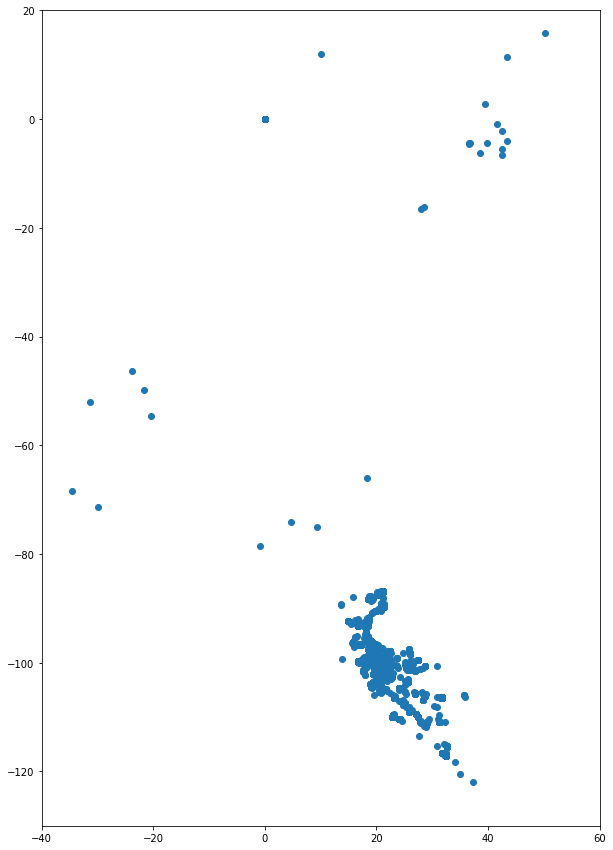

In [21]:
''' Se respeta el formato del plot según el tamaño de los ejes.'''

# Declarás variables a graficar
x = dfl['Latitud']
y = dfl['Longitud']

plt.figure(figsize = (10, 15))
plt.xlim([-40, 60])
plt.ylim([-130, 20])

# Tipo de gráfico
plt.scatter(x, y)

In [22]:
x = dfl['Fecha']
y = dfl['Precio']

plt.figure(figsize = (20, 10))
plt.lines(x, y)

AttributeError: module 'matplotlib.pyplot' has no attribute 'lines'

<Figure size 1440x720 with 0 Axes>